<a href="https://colab.research.google.com/github/Nastiiasaenko/Week4-XAI/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use the same dataset from Week4


In [ ]:
!pip install imodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.0/243.0 kB 7.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nastiiasaenko/Week-3XAI/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## Convert categorical variables to machine readable and dummies
df['gender'] = df['gender'].map(lambda x: {'Female': 1, 'Male': 0}[x.strip()])
df.Partner = df.Partner.map({'Yes':1, "No":0})
df.Dependents = df.Dependents.map({'Yes':1, "No":0})
df['PhoneService'] = df['PhoneService'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])
df['MultipleLines'] = df['MultipleLines'].map(lambda x: {'Yes': 1, 'No': 0, 'No phone service':2}[x.strip()])
df['InternetService'] = df['InternetService'].map(lambda x: {'DSL': 1, 'No': 0, 'Fiber optic':2}[x.strip()])
df['OnlineSecurity'] = df['OnlineSecurity'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['OnlineBackup'] = df['OnlineBackup'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['DeviceProtection'] = df['DeviceProtection'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['TechSupport'] = df['TechSupport'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['StreamingTV'] = df['StreamingTV'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['StreamingMovies'] = df['StreamingMovies'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['Contract'] = df['Contract'].map(lambda x: {'Month-to-month': 1, 'One year': 0, 'Two year':2}[x.strip()])
df['PaperlessBilling'] = df['PaperlessBilling'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])
df['PaymentMethod'] = df.PaymentMethod

# Store the original column names
original_columns = df.columns

# Generate dummy variables with drop_first=True
df = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True)

# Identify newly created dummy columns
new_dummy_columns = df.columns.difference(original_columns)

# Convert only the new dummy columns to 0/1
df[new_dummy_columns] = df[new_dummy_columns].astype(int)


df['Churn'] = df['Churn'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values in TotalCharges after conversion
missing_total_charges = df['TotalCharges'].isnull().sum()

# Filling missing values in TotalCharges with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Verify the conversion
df['TotalCharges'].dtype, missing_total_charges

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(dtype('float64'), 11)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (assuming you have it prepared similarly to the previous one)
X = df  # Load your dataset
y = X['Churn']  # Assuming 'churn' is the target variable
X = X.drop(columns=['PaymentMethod_Credit card (automatic)'], axis=1)
X = X.drop(columns=['Churn', 'customerID'], axis=1)  # Drop the target from the features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from imodels import RuleFitClassifier


# Initialize and train the RuleFit model
rulefit_model = RuleFitClassifier()
rulefit_model.fit(X_train, y_train)

# Make predictions
preds = rulefit_model.predict(X_test)

# Print the model and evaluation
print(rulefit_model)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> ------------------------------
> RuleFit:
> 	Predictions are made by summing the coefficients of each rule
> ------------------------------
                                                                                     rule  coef
                                                                             tenure > 5.5 -0.25
                                                                             tenure > 6.5 -0.01
                                                                            tenure > 12.5 -0.21
                                                                            tenure > 13.5 -0.07
                                                                            tenure > 17.5 -0.25
                                   PaymentMethod_Electronic check <= 0.5 and tenure > 1.5 -0.25
                                   PaymentMethod_Electronic check <= 0.5 and tenure > 4.5 -0.12
                                                                       OnlineBackup > 0.5 

In [ ]:
## Rule list

from imodels import OptimalRuleListClassifier

# Initialize and train the Optimal Rule List model
orl_model = OptimalRuleListClassifier()
orl_model.fit(X_train, y_train)

# Make predictions
orl_preds = orl_model.predict(X_test)

# Print the model
print(orl_model)


> ------------------------------
> Greedy Rule List
> ------------------------------
↓
11.4% risk (5282 pts)
	if ~OnlineSecurity ==> 41.4% risk (2625 pts)
↓
1.85% risk (2657 pts)
	if ~Contract ==> 17.4% risk (1629 pts)
↓
1.1% risk (1028 pts)
	if MonthlyCharges ==> 7.3999999999999995% risk (121 pts)
↓
0.0% risk (907 pts)
	if ~tenure ==> 1.5% risk (668 pts)
↓
0.0% risk (239 pts)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/imodels/rule_list/corels_wrapper.py:87: UserWarning: Should install corels with pip install corels. Using GreedyRuleList instead.
  warnings.warn("Should install corels with pip install corels. Using GreedyRuleList instead.")


Rule Tree


In [53]:
from imodels import SkopeRulesClassifier
from sklearn.model_selection import train_test_split


# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize and train the SkopeRules model
skope_model = SkopeRulesClassifier(max_depth=3, n_estimators=30, precision_min=0.3)
skope_model.fit(X_train, y_train)

# Make predictions
skope_preds = skope_model.predict(X_test)

# Print out the rules extracted by the SkopeRules model
print("Extracted Rules:")
rules = skope_model.rules_
for rule in rules:
    print(rule)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Extracted Rules:
Contract > 0.5 and OnlineSecurity <= 0.5 and TechSupport <= 0.5
MonthlyCharges > 69.225 and OnlineSecurity <= 0.5 and tenure <= 16.5
InternetService > 1.5 and OnlineSecurity <= 0.5 and TotalCharges <= 1285.0
MonthlyCharges > 68.625 and OnlineSecurity <= 0.5 and tenure <= 16.5
InternetService > 1.5 and OnlineSecurity <= 0.5 and tenure <= 16.5
InternetService > 1.5 and OnlineSecurity <= 0.5 and TotalCharges <= 1219.20001
InternetService > 1.5 and OnlineSecurity <= 0.5 and TotalCharges <= 1182.0
InternetService > 1.5 and TechSupport <= 0.5 and tenure <= 14.5
MonthlyCharges > 68.6 and OnlineSecurity <= 0.5 and tenure <= 12.5
MonthlyCharges > 68.15 and OnlineSecurity <= 0.5 and tenure <= 14.5
InternetService > 1.5 and OnlineSecurity <= 0.5 and tenure <= 12.5
InternetService > 1.5 and OnlineSecurity <= 0.5 and TotalCharges <= 1217.75
InternetService > 1.5 and OnlineSecurity <= 0.5 and tenure <= 13.5
MonthlyCharges > 68.6 and OnlineSecurity <= 0.5 and tenure <= 10.5
OnlineSec

In [56]:
# Print the attributes of the first rule to inspect what it contains
first_rule = skope_model.rules_[0]
print(dir(first_rule))
# Print the first few rules to see what they look like
for rule in skope_model.rules_[:5]:
    print(rule)


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', 'agg_dict', 'args', 'factorize', 'rule', 'support', 'terms']
Contract > 0.5 and OnlineSecurity <= 0.5 and TechSupport <= 0.5
MonthlyCharges > 69.225 and OnlineSecurity <= 0.5 and tenure <= 16.5
InternetService > 1.5 and OnlineSecurity <= 0.5 and TotalCharges <= 1285.0
MonthlyCharges > 68.625 and OnlineSecurity <= 0.5 and tenure <= 16.5
InternetService > 1.5 and OnlineSecurity <= 0.5 and tenure <= 16.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
pip install graphviz


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
from graphviz import Digraph

# Initialize a new graph
dot = Digraph()

# Add the starting node (root)
dot.node('A', 'Start')

# Add nodes representing key rules (subset of rules)
dot.node('B', 'Contract > 0.5')
dot.node('C', 'OnlineSecurity <= 0.5')
dot.node('D', 'TechSupport <= 0.5')
dot.node('E', 'MonthlyCharges > 69.225')
dot.node('F', 'tenure <= 16.5')

# Define paths (edges) based on the rules
dot.edge('A', 'B', 'If Contract > 0.5')
dot.edge('B', 'C', 'If OnlineSecurity <= 0.5')
dot.edge('C', 'D', 'If TechSupport <= 0.5')
dot.edge('C', 'E', 'Else MonthlyCharges > 69.225')
dot.edge('E', 'F', 'If tenure <= 16.5')
dot.edge('D', 'F', 'Else tenure <= 16.5')

# Add outcomes at the leaves
dot.node('G', 'Churn = Yes')
dot.node('H', 'Churn = No')

dot.edge('F', 'G', 'Outcome: Churn')
dot.edge('E', 'H', 'Outcome: No Churn')

# Render the graph
dot.render('rules_tree_diagram', format='png', view=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'rules_tree_diagram.png'

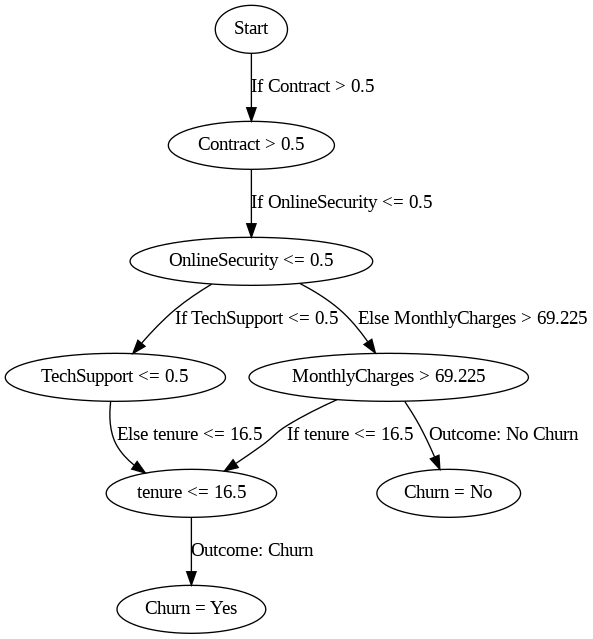